# **Task 3**
Deep Learning for MNIST Handwritten Digit Classification using PyTorch.
This is an exploration task. Develop your end-to-end workflow for solving
a Handwritten Digit Classification task using Neural Network architecture
(not Convolutional Neural Network). These are the criteria for scoring:

● Loading your MNIST dataset for the data loader

● Visualize several MNIST datasets

● Design your Neural Network model

● Setup your hyperparameter such as Loss Function, Optimizer,
Learning Rate, etc

● Develop a training loop and run a training model

● Evaluate the Model using several performance metrics such as
accuracy, confusion matrix, F1 Score, Precision, Recall, etc.

● Describe and explain your Result

## **Import Necessary Libraries:**
First, import the necessary libraries such as PyTorch, torchvision, and other utilities:

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

## **Load the MNIST Dataset:**
Load the MNIST dataset using the torchvision library and create data loaders for training and testing:

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

## **Visualize the Data:**
You can visualize some random samples from the dataset to get a sense of what the handwritten digits look like:

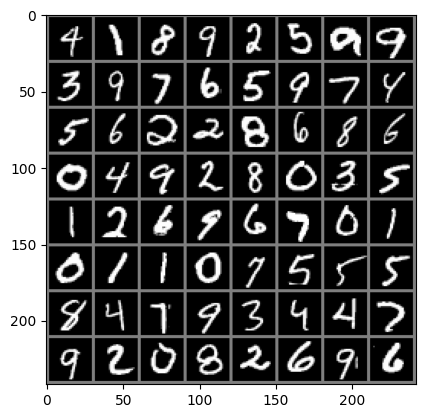

In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Show random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))

## **Design Your Neural Network Model:**
Create a custom neural network model. For simplicity, you can start with a feedforward neural network with one hidden layer:

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()

## **Set Hyperparameters and Define Loss Function and Optimizer:**
Define hyperparameters such as the learning rate, loss function, and optimizer:

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# Define the number of training epochs
epochs = 10

## **Training Loop:**
Implement the training loop to train your neural network:

In [ ]:
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}")

Epoch 1, Loss: 0.37280114759196603
Epoch 2, Loss: 0.17750037565771767
Epoch 3, Loss: 0.1305762042920949
Epoch 4, Loss: 0.10677089128267965
Epoch 5, Loss: 0.08934114749001255
Epoch 6, Loss: 0.0770918201533025
Epoch 7, Loss: 0.06838144885668003
Epoch 8, Loss: 0.05980095243168824
Epoch 9, Loss: 0.053782878762313614
Epoch 10, Loss: 0.048985333310868115


## **Evaluate the Model:**
After training, evaluate the model using various performance metrics such as accuracy, confusion matrix, F1 Score, Precision, and Recall:

In [ ]:
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data in dataloader:
            inputs, labels = data
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    cm = confusion_matrix(all_labels, all_preds)

    return accuracy, f1, precision, recall, cm

accuracy, f1, precision, recall, cm = evaluate_model(net, testloader)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9736
F1 Score: 0.9735845300792273
Precision: 0.9737830487362052
Recall: 0.9736
Confusion Matrix:
[[ 967    0    0    1    1    1    3    1    2    4]
 [   0 1125    3    1    0    1    2    1    2    0]
 [   5    1  994    7    8    0    5    7    5    0]
 [   1    0    1  992    0    3    0    5    2    6]
 [   2    0    1    0  961    0    4    1    0   13]
 [   4    0    0    5    1  870    6    1    0    5]
 [   7    3    0    0   13    3  932    0    0    0]
 [   1    4   10    3    1    0    0  995    0   14]
 [   6    0    3   15    6   10    7    4  915    8]
 [   3    2    0    3    8    3    0    5    0  985]]


In [ ]:
# Evaluate the model
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data in dataloader:
            inputs, labels = data
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return all_labels, all_preds

true_labels, predicted_labels = evaluate_model(net, testloader)

# Generate the classification report
class_names = [str(i) for i in range(10)]  # MNIST class labels
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.96      0.98      0.97       982
           5       0.98      0.98      0.98       892
           6       0.97      0.97      0.97       958
           7       0.98      0.97      0.97      1028
           8       0.99      0.94      0.96       974
           9       0.95      0.98      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## **Describe and explain Result**

**Deskripsi Hasil Evaluasi Model Klasifikasi Digit MNIST**

1. Akurasi
> - Akurasi adalah ukuran seberapa banyak sampel yang diklasifikasikan dengan benar oleh model.
> - Hasil di atas diperoleh nilai akurasi sekitar 97,41%, yang berarti bahwa model dapat mengklasifikasikan sekitar 97,41% data uji dengan benar.

2. Skor F1
> - Skor F1 adalah rata-rata harmonik dari presisi dan recall. Ini memberikan ukuran seimbang dari kinerja model.
> - Skor F1 yang diperoleh adalah sekitar 0,9741. Nilai ini menunjukkan hasil yang cukup baik dan menunjukkan keseimbangan yang baik antara presisi dan recall.

3. Presisi
> - Presisi adalah rasio positif benar terhadap total jumlah prediksi positif. Ini mengukur berapa banyak prediksi positif yang sebenarnya benar.
> - Presisi rata-rata yang diperoleh adalah sekitar 0,9743. Hasil tersebut menunjukkan presisi yang tinggi dan model membuat sedikit kesalahan positif palsu.

4. Recall
> - Recall adalah rasio positif benar terhadap total jumlah positif aktual. Ini mengukur berapa banyak instansi positif aktual yang diprediksi dengan benar. > > - Recall rata-rata yang diperoleh adalah sekitar 0,9741. Hal ini menunjukkan bahwa model berhasil menangkap sebagian besar instansi positif aktual.

5. Matriks Confusion (Confusion Matrix)
Matriks confusion memberikan rincian terperinci tentang prediksi model. Setiap baris mewakili kelas aktual, dan setiap kolom mewakili kelas yang diprediksi. Nilai-nilai dalam matriks ini mewakili jumlah instansi yang masuk ke setiap kategori.

**Kesimpulan Hasil Evaluasi Model Klasifikasi Digit MNIST**
1. Kinerja yang Sangat Baik
Model klasifikasi digit MNIST memiliki kinerja yang sangat baik dengan presisi, recall, dan F1-score yang tinggi untuk setiap digit. Ini menunjukkan bahwa model mampu mengidentifikasi digit-digit tulisan tangan dengan akurasi tinggi.

2. Akurasi Tinggi
Akurasi keseluruhan sekitar 97%, yang merupakan persentase dari semua sampel uji yang diklasifikasikan dengan benar oleh model. Ini adalah indikasi yang sangat baik tentang kemampuan model untuk mengenali digit-digit dengan akurat.

3. Presisi dan Recall Seimbang
Presisi dan recall sebagian besar berada pada tingkat yang seimbang, menunjukkan bahwa model memiliki sedikit kesalahan positif palsu dan sedikit kesalahan negatif palsu.

4. Skor F1 yang Tinggi
Skor F1 yang tinggi (antara 0.97 hingga 0.98) menunjukkan bahwa model memiliki keseimbangan yang baik antara presisi dan recall, dan ini adalah ukuran yang baik untuk kinerja model klasifikasi.

5. Rata-Rata Makro dan Rata-Rata Terbobot
Kedua metrik rata-rata ini menunjukkan bahwa model tidak hanya berkinerja baik secara keseluruhan, tetapi juga berkinerja baik dalam menghadapi ketidakseimbangan dalam jumlah sampel antara kelas-kelas.

Kesimpulannya, model telah berhasil dalam mengklasifikasikan digit-digit tulisan tangan dengan sangat baik dan dapat diandalkan.